# Credit Card Fraud detection

+ A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person’s name on it to charge purchases and services to his linked account. Charges are debited regularly. Nowadays, card data is read by ATMs, swiping machines, store readers, banks and online transactions.


+ Each card has a unique card number which is very important. Its security mainly relies on the physical security of the card and also the privacy of the credit card number. There is a rapid growth in credit card transactions which has led to substantial growth in scam cases.



+ Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. Multiple data mining and statistical techniques are used to catch fraud. Therefore the detection of fraud using efficient and secured methods are very important.


## Tasks To Be Performed:

+ Build a machine learning model to identify fraudulent credit card
transactions.
+ Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
+ Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
+ Evaluate the model'
s performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [1]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
import warnings
warnings.filterwarnings('ignore')

####  Load the dataset using the pandas module.

In [2]:
data = pd.read_csv('creditcard.csv') #read dataset

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape # shape of our dataset

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Perform missing value analysis on the dataset.

In [6]:
data.isnull().sum() #checking null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.duplicated().sum() #checking the duplicate values

1081

In [8]:
data.drop_duplicates(keep='first', inplace=True) #removing duplicate values 

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(283726, 31)

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
data["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

#### From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [13]:
non_fraud = len(data[data.Class == 0])
print("Number of Genuine transactions: ", non_fraud)

Number of Genuine transactions:  283253


In [14]:
fraud = len(data[data.Class == 1])
print("Number of Fraud transactions: ", fraud)

Number of Fraud transactions:  473


In [15]:
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Percentage of Fraud transactions: 0.1667


#### Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.


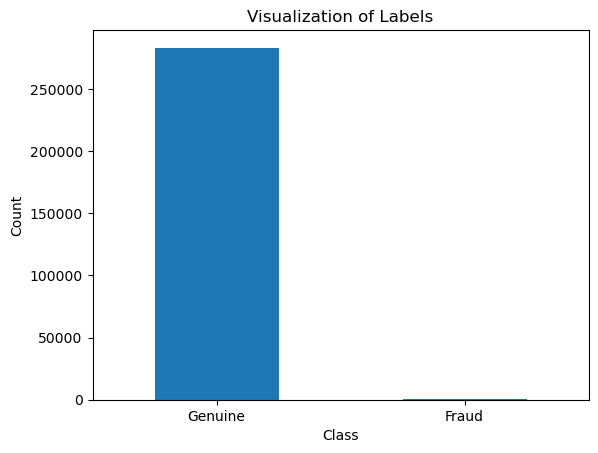

In [16]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#### Using the Standard Scaler module, normalize the amount column and store the new values in the Normalized Amount column.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = data["Class"]
X = data.drop(["Class"], axis= 1)

In [18]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [19]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


#### Split the dataset in train and test set and have a 70:30 split ratio for the model.


In [20]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (198608, 29)
Shape of test_X:  (85118, 29)


#### Now use a logistic regression, decision tree and random forest model for training on top of the train set.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
#Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

In [23]:
#Decision Tree
decision_tree = DecisionTreeClassifier()

In [24]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

#### Compare the predictions of all models using predict().

In [25]:
logistic_regression .fit(train_X, train_Y)
predictions_lr = logistic_regression.predict(test_X)
logistic_regression_score = logistic_regression.score(test_X, test_Y) * 100
print("Logistic_Regression Score: ", logistic_regression_score)

Logistic_Regression Score:  99.91541154632392


In [26]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95183157499001


In [27]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.90601282924881


In [28]:
predictions_lr[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
predictions_dt[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [30]:
predictions_rf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

#### Compare the accuracy of all models using score().

In [31]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [32]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [33]:
metrics(test_Y, predictions_lr)

Accuracy: 0.99915
Precision: 0.86047
Recall: 0.55224
F1-score: 0.67273


In [34]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99906
Precision: 0.68493
Recall: 0.74627
F1-score: 0.71429


In [35]:
metrics(test_Y, predictions_rf)

Accuracy: 0.99952
Precision: 0.95146
Recall: 0.73134
F1-score: 0.82700


#### Check the performance matrix of all models and compare which model is having the highest performance.

In [36]:
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)


Confusion Matrix - Logistic Regression
[[84972    12]
 [   60    74]]


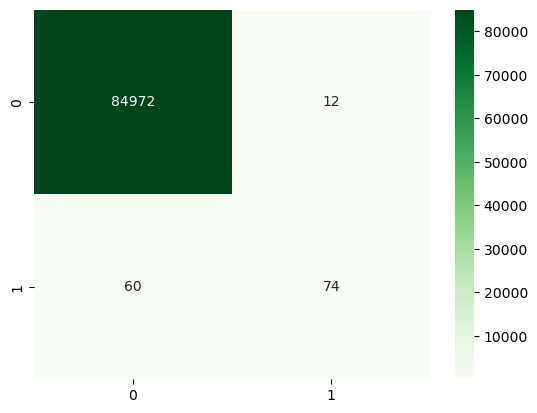

In [37]:
sns.heatmap(confusion_matrix_lr ,cmap='Greens',annot=True,fmt='d')
plt.show()

In [39]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[84938    46]
 [   34   100]]


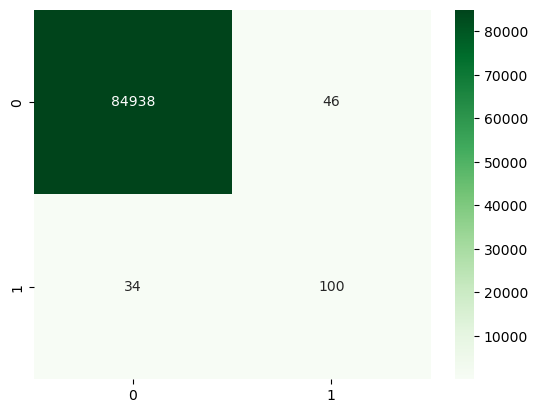

In [40]:
sns.heatmap(confusion_matrix_dt ,cmap='Greens',annot=True,fmt='d')
plt.show()

In [41]:
confusion_matrix_df = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_df)


Confusion Matrix - Random Forest
[[84979     5]
 [   36    98]]


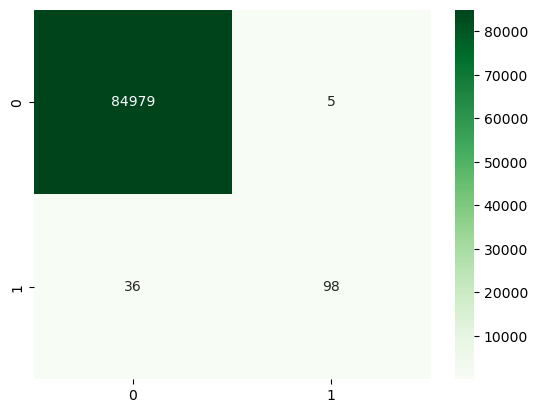

In [42]:
sns.heatmap(confusion_matrix_df,cmap='Greens',annot=True,fmt='d')
plt.show()

#### Data Visualization of score of different Models

In [43]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy = [accuracy_score(test_Y, predictions_lr),
            accuracy_score(test_Y, predictions_dt),
            accuracy_score(test_Y, predictions_rf),]
precision = [precision_score(test_Y, predictions_lr),
             precision_score(test_Y, predictions_dt),
             precision_score(test_Y, predictions_rf),]
recall = [recall_score(test_Y, predictions_lr),
          recall_score(test_Y, predictions_dt),
          recall_score(test_Y, predictions_rf),]
f1 = [f1_score(test_Y, predictions_lr),
      f1_score(test_Y, predictions_dt),
      f1_score(test_Y, predictions_rf),]


# Create a DataFrame for easier visualization
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
})

In [44]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.999154,0.860465,0.552239,0.672727
1,Decision Tree,0.999060,0.684932,0.746269,0.714286
2,Random Forest,0.999518,0.951456,0.731343,0.827004


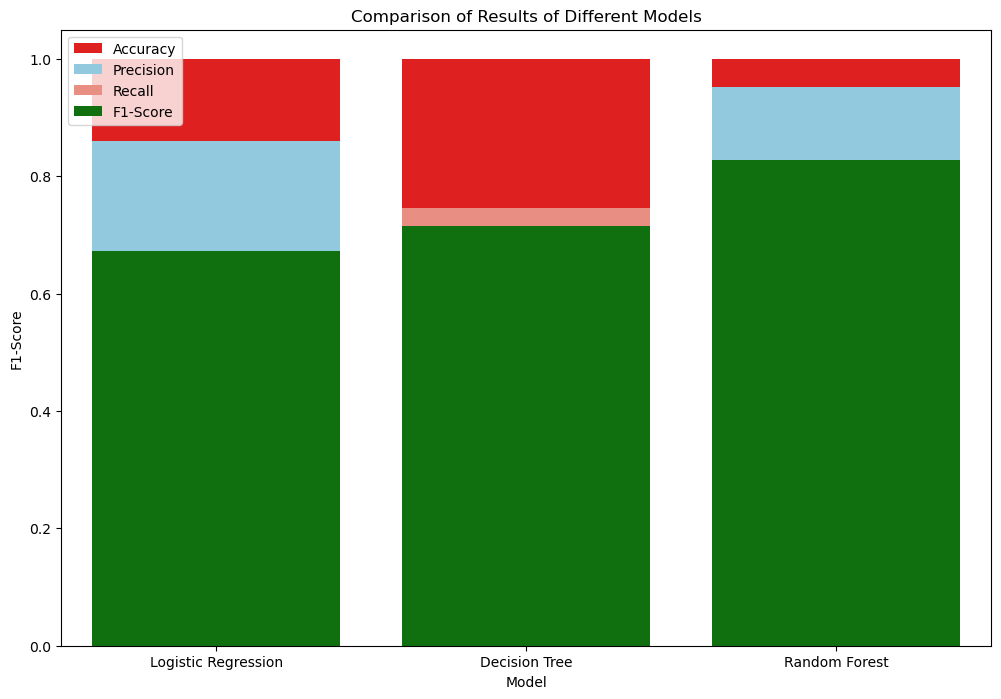

In [45]:
# Plot the results using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Model', y='Accuracy', color='Red', label='Accuracy')
sns.barplot(data=results_df, x='Model', y='Precision', color='skyblue', label='Precision')
sns.barplot(data=results_df, x='Model', y='Recall', color='salmon', label='Recall')
sns.barplot(data=results_df, x='Model', y='F1-Score', color='green', label='F1-Score')
plt.title('Comparison of Results of Different Models')
plt.legend()
plt.show()


In [46]:
# Determine the best model based on a specific metric
best_model_auc = results_df.loc[results_df['Accuracy'].idxmax()]
best_model_precision = results_df.loc[results_df['Precision'].idxmax()]
best_model_recall = results_df.loc[results_df['Recall'].idxmax()]
best_model_f1 = results_df.loc[results_df['F1-Score'].idxmax()]

print("\nBest Model (Accuracy):")
print(best_model_auc)

print("\nBest Model (Precision):")
print(best_model_precision)

print("\nBest Model (Recall):")
print(best_model_recall)

print("\nBest Model (F1-Score):")
print(best_model_f1)
                  


Best Model (Accuracy):
Model        Random Forest
Accuracy          0.999518
Precision         0.951456
Recall            0.731343
F1-Score          0.827004
Name: 2, dtype: object

Best Model (Precision):
Model        Random Forest
Accuracy          0.999518
Precision         0.951456
Recall            0.731343
F1-Score          0.827004
Name: 2, dtype: object

Best Model (Recall):
Model        Decision Tree
Accuracy           0.99906
Precision         0.684932
Recall            0.746269
F1-Score          0.714286
Name: 1, dtype: object

Best Model (F1-Score):
Model        Random Forest
Accuracy          0.999518
Precision         0.951456
Recall            0.731343
F1-Score          0.827004
Name: 2, dtype: object


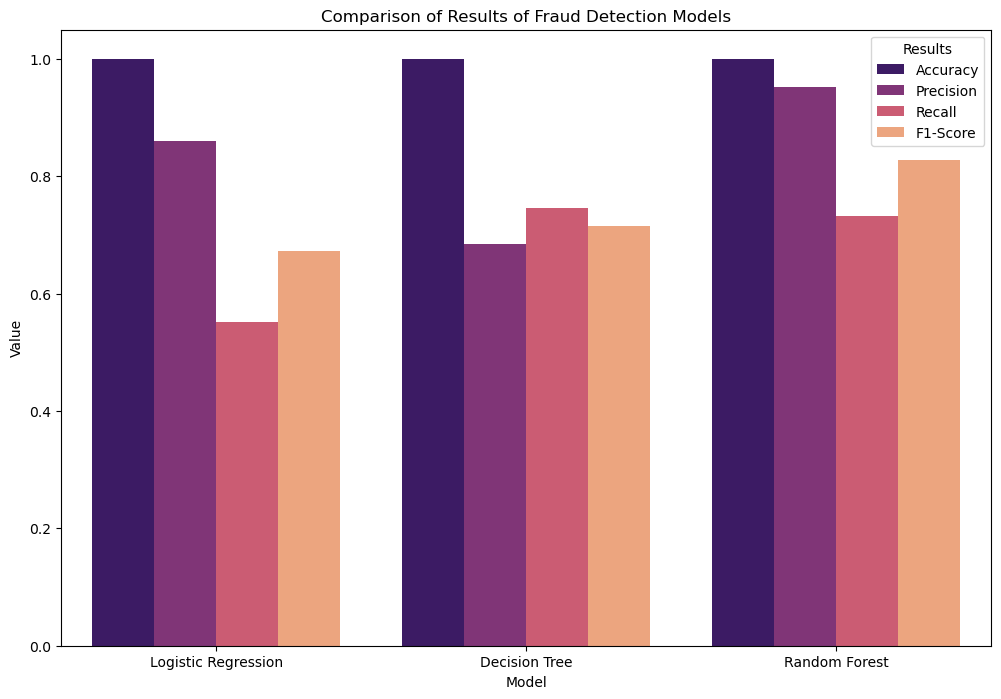

In [47]:
# Create a bar chart for precision, recall, and F1-Score metrics
plt.figure(figsize=(12, 8))
results_df_melted = pd.melt(results_df, id_vars='Model', var_name='Results', value_name='Value')
sns.barplot(data=results_df_melted, x='Model', y='Value', hue='Results', palette="magma")
plt.title('Comparison of Results of Fraud Detection Models')
plt.ylabel('Value')
plt.show()

### Conclusion

**As the analysis identifies the Random Forest model as the best performer based on the F1-Score metric. With an Accuracy of 0.999518, Precision of 0.951456 Recall of 0.731343 and F1-Score of 0.827004, the Random Forest model demonstrates a balanced performance across all metrices, making it a robust choice for the given task.**